In [9]:
%matplotlib inline


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [11]:
from statsmodels.graphics.api import qqplot

In [12]:
from statsmodels.graphics.tsaplots import plot_predict

In [13]:
import numpy as np
import pandas as pd
#import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

In [14]:
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])

In [15]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [16]:
dates = pd.date_range("1980-1-1", freq="M", periods=nobs)
y = pd.Series(y, index=dates)
arma_mod = ARIMA(y, order=(2, 0, 2), trend="n")
arma_res = arma_mod.fit()

In [17]:
print(arma_res)

In [18]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
Freq: M, dtype: float64

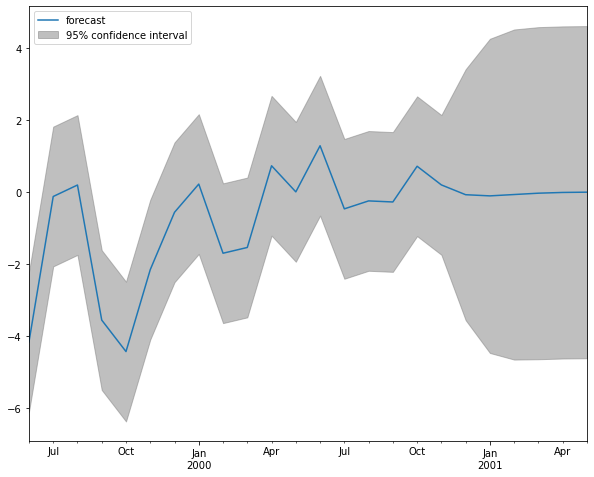

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arma_res, start="1999-06-30", end="2001-05-31", ax=ax)
legend = ax.legend(loc="upper left")

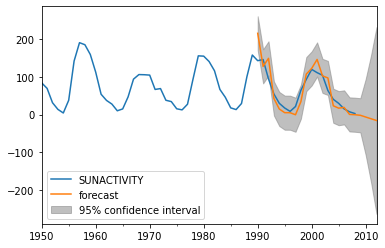

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()